Completed in December 2018

# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [1]:
# Функция записи результата
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [2]:
import pandas as pd
adver_data = pd.read_csv('data/advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [3]:
# Смотрим первые 5 записей
print (adver_data.head())

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


In [4]:
# Смотрим статистику признаков 
print (adver_data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


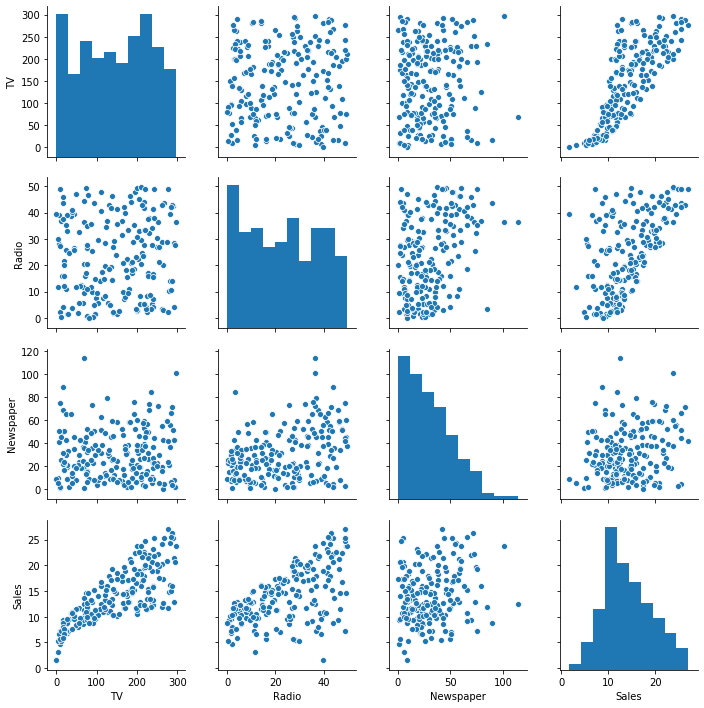

In [5]:
# Смотрим статистику признаков 
import seaborn as sns
sns.pairplot(adver_data)

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales.**

In [6]:
import numpy as np
X = adver_data[['TV','Radio','Newspaper']]
y = adver_data[['Sales']]
print (X.head())
print (y.head())

      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
   Sales
1   22.1
2   10.4
3    9.3
4   18.5
5   12.9


**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [7]:
# Смотрим на среднее значение и стандартное отклонение X
print ('Среднее значение TV =',np.mean(X['TV']),'Стандартное отклонение TV =',np.std(X['TV']))
print ('Среднее значение Radio=',np.mean(X['Radio']),'Стандартное отклонение Radio=',np.std(X['Radio']))
print ('Среднее значение News=',np.mean(X['Newspaper']),'Стандартное отклонение =',np.std(X['Newspaper']))

# Заодно посмотрим, что там в матрице y
print ('Среднее значение Sales=',np.mean(y)[0],'Среднее значение Sales=',np.std(y)[0])

Среднее значение TV = 147.0425 Стандартное отклонение TV = 85.63933175679271
Среднее значение Radio= 23.264000000000024 Стандартное отклонение Radio= 14.809645640595184
Среднее значение News= 30.553999999999995 Стандартное отклонение = 21.724106057557357
Среднее значение Sales= 14.022500000000003 Среднее значение Sales= 5.204396578855227


In [8]:
# Масштабируем матрицу. То есть 0 соответствует среднему значению, 
# а плюс-минус в стандартных отклонениях
print (X.head())
Z=pd.DataFrame()
Z['TV'] = (X['TV']-np.mean(X['TV']))/np.std(X['TV'])
Z['Radio'] = (X['Radio']-np.mean(X['Radio']))/np.std(X['Radio'])
Z['Newspaper'] = (X['Newspaper']-np.mean(X['Newspaper']))/np.std(X['Newspaper'])
X = Z
print (X.head())

TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
         TV     Radio  Newspaper
1  0.969852  0.981522   1.778945
2 -1.197376  1.082808   0.669579
3 -1.516155  1.528463   1.783549
4  0.052050  1.217855   1.286405
5  0.394182 -0.841614   1.281802


**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [9]:
print (X.head())
X['w0']=1
X = X[['w0','TV','Radio','Newspaper']]
print (X.head())

TV     Radio  Newspaper
1  0.969852  0.981522   1.778945
2 -1.197376  1.082808   0.669579
3 -1.516155  1.528463   1.783549
4  0.052050  1.217855   1.286405
5  0.394182 -0.841614   1.281802
   w0        TV     Radio  Newspaper
1   1  0.969852  0.981522   1.778945
2   1 -1.197376  1.082808   0.669579
3   1 -1.516155  1.528463   1.783549
4   1  0.052050  1.217855   1.286405
5   1  0.394182 -0.841614   1.281802


**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [10]:
# map в ламбда функцию двух переменных
def mserror(y, y_pred):
    result = list(map(lambda y,y_pred: ((y-y_pred)**2), y, y_pred))
    return np.mean(result)

In [11]:
# Находим медиану (как в статистике) и создаем DF столбец из ее значений
print (y.head())
y_med = [{'Median': np.median(y['Sales'])} for i in range(len(y))]
y_median = pd.DataFrame(y_med,index=y.index)
print (y_median.head())

Sales
1   22.1
2   10.4
3    9.3
4   18.5
5   12.9
   Median
1    12.9
2    12.9
3    12.9
4    12.9
5    12.9


**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [12]:
# Просто в функцию для расчета среднеквадратичной ошибки загоняем известные ответы
# и "предсказанные" значения, здесь просто столбец из медианы
answer1 = mserror(y['Sales'],y_median['Median']) # Ваш код здесь
print(answer1)
write_answer_to_file(answer1, 'answers/2.2. Linear regression & SGD - answer 1.txt')

28.34575


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).


In [13]:
# Реализуем функцию
def normal_equation(X, y):
    left = np.dot(np.transpose(X), X)
    right = np.dot(np.transpose(X), y)
    return np.linalg.solve(left, right)

In [14]:
# Считаем веса для заданных X и у
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[[14.0225    ]
 [ 3.91925365]
 [ 2.79206274]
 [-0.02253861]]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [15]:
# средние затраты означают что затраты на tv, radio, newspapers приравниваются нулю 
# и остается только свободный член
srednie = [[1,0,0,0]]
answer2 = np.dot(srednie, norm_eq_weights)
print(answer2)
write_answer_to_file(answer2[0][0], 'answers/2.2. Linear regression & SGD - answer 2.txt')

[[14.0225]]


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [16]:
print (X.head())

w0        TV     Radio  Newspaper
1   1  0.969852  0.981522   1.778945
2   1 -1.197376  1.082808   0.669579
3   1 -1.516155  1.528463   1.783549
4   1  0.052050  1.217855   1.286405
5   1  0.394182 -0.841614   1.281802


In [17]:
# Перемножаем матрицу X на ее веса для каждой строки
# Получаем значение прогноза для каждой строки
def linear_prediction(X, w):
    linpred_out = np.dot(X,w)
    return linpred_out
predskazali = linear_prediction(X,norm_eq_weights)
predskazali = pd.DataFrame({'Lin_model': predskazali[:,0]})# преобразуем в pandas dataframe
print (predskazali[:5])
# Проверка 
# 1*14.0225 + 0.969852*3.91925365 + 0.981522*2.79206274+1.778945*(-0.02253861) = 20.523972048083635

Lin_model
0  20.523974
1  12.337855
2  12.307671
3  17.597830
4  13.188672


**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [18]:
# Надо просто посчитать через реализованную функцию
answer3 = mserror(y['Sales'],predskazali['Lin_model'])
print(answer3)
write_answer_to_file(answer3, 'answers/2.2. Linear regression & SGD - answer 3.txt')

2.784126314510936


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [19]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    X_st = X.iloc[train_ind].values # выбираем одну строку
    y_st = y.iloc[train_ind].values # выбираем один ответ
#     Считаем частные производные для каждого признака отдельно. 
#     200 в знаменателе т.к. 200 строк в матрице X. Формула в разделе 2.3
    grad0 = float(2./200.*X_st[0]*(np.dot(X_st, (np.reshape(w, [4,1])))-y_st))
    grad1 = float(2./200.*X_st[1]*(np.dot(X_st, (np.reshape(w, [4,1])))-y_st))
    grad2 = float(2./200.*X_st[2]*(np.dot(X_st, (np.reshape(w, [4,1])))-y_st))
    grad3 = float(2./200.*X_st[3]*(np.dot(X_st, (np.reshape(w, [4,1])))-y_st))
#     Вычитаем из вектора весов полученную матрицу умноженную на шаг
    vyhod = w - eta * np.array([grad0, grad1, grad2, grad3])
    return vyhod

stochastic_gradient_step (X, y,np.zeros(4), 190)

array([ 0.00108   , -0.00135622,  0.0013007 , -0.00123063])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [20]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4, min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # берем случайный индекс 
        random_ind = np.random.randint(X.shape[0])

        w_new = stochastic_gradient_step(X,y,w,random_ind,eta) # делаем шаг и получаем новые веса
        predskaz = linear_prediction(X, w_new) # для весов делаем предсказание (здесь возможно w просто)
        predskaz = pd.DataFrame({'Stoch_model': predskaz}) # преобразуем его в DF
        errors.append(mserror(y['Sales'],predskaz['Stoch_model'])) # считаем ошибку и добавляем значение в массив
        weight_dist = np.linalg.norm(w-w_new) # значения поиндексово вычитаются между собой, 
        # затем складываются их квадраты и от полученного значения берется корень
        iter_num +=1
        w = w_new
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [21]:
%%time
w_init = np.zeros(4)
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y,
                                                            w_init, max_iter=1e5)

CPU times: user 3min 3s, sys: 3.37 s, total: 3min 6s
Wall time: 4min 17s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

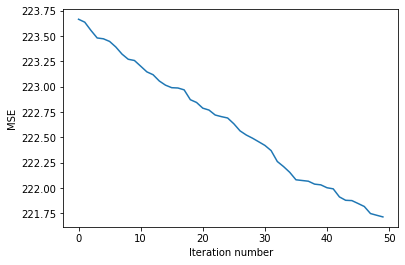

In [22]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

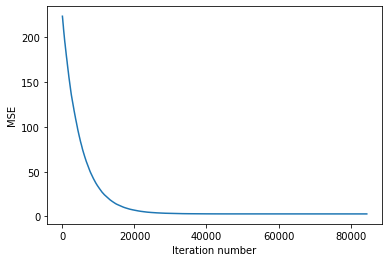

In [23]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [24]:
stoch_grad_desc_weights

array([ 1.40190566e+01,  3.91069256e+00,  2.78209808e+00, -8.10462217e-03])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [25]:
stoch_errors_by_iter[-1]

2.7844125884067035

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [26]:
answer4 = mserror(y['Sales'], linear_prediction(X,stoch_grad_desc_weights))# Ваш код здесь
print(answer4)
write_answer_to_file(answer4, 'answers/2.2. Linear regression & SGD - answer 4.txt')

2.7844125884067035


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**